# Stochastic, mini-Batch, Batch Gradient Descent and Dataloader

In this notebook, a generic dataset loader that enables mini-Batch and Stochastic Gradient Descent is implemented. The keypoints of this experiment are the following:

* Assuming a __non-parallel implementation__, __Batch Gradient Descent (BGD) calculates the fastest__ among the three.
* Batch Gradient Descent's calculating the fastest among the three does not necessarily mean that it also converges the fastest to the minimum. 
* Smaller learning rate values is needed for smaller batch sizes
* __Stochastic Gradient Descent (SGD)__ is a magnitude slower than the two, and therefore, it is omitted in this experiment. 
* __Mini-batch Gradient Descent__ is the better compromise between the three. A __good choice of batch size and learning rate__ may produce good performance, while also minimizing the time and computational cost of training a model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mnist
from activation import relu, sigmoid, sigmoid_prime, softmax
from helper import one_hot_encoder
from initializer import initialize_weight
%matplotlib inline

from utils import dataloader

In [2]:
def train(train_x, train_y, learning_rate=0.1, num_epochs=50, batch_size=1):
    # Flatten input (num_samples, 28, 28) -> (num_samples, 784) 
    x = train_x.reshape(train_x.shape[0], -1)
    num_samples = x.shape[0]
    
    # Turn labels into their one-hot representations
    y = one_hot_encoder(train_y)

    # Make a data loader
    trainloader = dataloader(x, y, batch_size=batch_size, shuffle=True)
    
    # Initialize weights
    w1, b1 = initialize_weight((784, 256), bias=True)
    w2, b2 = initialize_weight((256, 10), bias=True)

    loss_history = []
    for epoch in range(1, num_epochs+1):
        print("Epoch {}/{}\n===============".format(epoch, num_epochs))

        batch_loss = 0
        acc = 0
        for inputs, labels in trainloader:
            # Number of samples per batch
            m = inputs.shape[0]
            
            # Forward Prop
            h1 = np.dot(inputs, w1) + b1
            a1 = sigmoid(h1)
            h2 = np.dot(a1, w2) + b2
            a2 = softmax(h2)
            out = a2

            # Cross Entropy Loss
            batch_loss += cross_entropy_loss(out, labels.argmax(axis=1).reshape(m,1))

            # Compute Accuracy
            pred = np.argmax(out, axis=1)
            pred = pred.reshape(pred.shape[0], 1)
            acc += np.sum(pred == labels.argmax(axis=1).reshape(m,1))

            # Backward Prop
            dh2 = a2 - labels 
            dw2 = (1/m) * np.dot(a1.T, dh2)
            db2 = (1/m) * np.sum(dh2, axis=0, keepdims=True)

            dh1 = np.dot(dh2, w2.T) * sigmoid_prime(a1)
            dw1 = (1/m) * np.dot(inputs.T, dh1)
            db1 = (1/m) * np.sum(dh1, axis=0, keepdims=True)

            # Weight (and bias) update
            w1 -= learning_rate * dw1
            b1 -= learning_rate * db1
            w2 -= learning_rate * dw2
            b2 -= learning_rate * db2
            
        loss_history.append(batch_loss/num_samples)
        print("Loss: {:.6f}".format(batch_loss/num_samples))
        print("Accuracy: {:.2f}%\n".format(acc/num_samples*100))

    return w1, b1, w2, b2, loss_history

def cross_entropy_loss(out, y):
    batch_size = y.shape[0]
    y = y.reshape(batch_size)
    log_likelihood = -np.log(out[np.arange(batch_size), y])
    return np.sum(log_likelihood)

In [3]:
# Load dataset
train_x, train_y = mnist.load_dataset(download=True, train=True)
test_x, test_y = mnist.load_dataset(download=True, train=False)

Found and verified data/t10k-images-idx3-ubyte.gz
Found and verified data/t10k-labels-idx1-ubyte.gz
Found and verified data/train-images-idx3-ubyte.gz
Found and verified data/train-labels-idx1-ubyte.gz
Found and verified data/t10k-images-idx3-ubyte.gz
Found and verified data/t10k-labels-idx1-ubyte.gz
Found and verified data/train-images-idx3-ubyte.gz
Found and verified data/train-labels-idx1-ubyte.gz


In [4]:
# Batch Gradient Descent
w1_bgd, b1_bgd, w2_bgd, b2_bgd, loss_history_bgd = train(train_x, train_y, learning_rate=0.2, num_epochs=20, batch_size=None)

Epoch 1/20
Loss: 2.507978
Accuracy: 9.36%

Epoch 2/20
Loss: 2.119753
Accuracy: 33.29%

Epoch 3/20
Loss: 1.771465
Accuracy: 47.28%

Epoch 4/20
Loss: 1.609259
Accuracy: 50.66%

Epoch 5/20
Loss: 1.409475
Accuracy: 57.37%

Epoch 6/20
Loss: 1.212161
Accuracy: 63.29%

Epoch 7/20
Loss: 1.110838
Accuracy: 68.16%

Epoch 8/20
Loss: 1.006603
Accuracy: 70.79%

Epoch 9/20
Loss: 0.924600
Accuracy: 76.35%

Epoch 10/20
Loss: 0.856999
Accuracy: 76.07%

Epoch 11/20
Loss: 0.806822
Accuracy: 80.19%

Epoch 12/20
Loss: 0.788305
Accuracy: 76.78%

Epoch 13/20
Loss: 0.767588
Accuracy: 79.50%

Epoch 14/20
Loss: 0.773671
Accuracy: 75.31%

Epoch 15/20
Loss: 0.753177
Accuracy: 78.37%

Epoch 16/20
Loss: 0.716950
Accuracy: 77.40%

Epoch 17/20
Loss: 0.679173
Accuracy: 81.19%

Epoch 18/20
Loss: 0.632208
Accuracy: 81.63%

Epoch 19/20
Loss: 0.601936
Accuracy: 84.41%

Epoch 20/20
Loss: 0.573346
Accuracy: 84.83%



In [5]:
# Minibatch Gradient Descent with batch_size 64
w1_mbgd, b1_mbgd, w2_mbgd, b2_mbgd, loss_history_mbgd = train(train_x, train_y, learning_rate=0.1, num_epochs=20, batch_size=64)

Epoch 1/20


C:\Users\Rusty\Desktop\mnist_experiments\activation.py:9: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


Loss: 0.560291
Accuracy: 84.58%

Epoch 2/20
Loss: 0.407835
Accuracy: 88.56%

Epoch 3/20
Loss: 0.392708
Accuracy: 88.81%

Epoch 4/20
Loss: 0.384136
Accuracy: 88.86%

Epoch 5/20
Loss: 0.388819
Accuracy: 88.49%

Epoch 6/20
Loss: 0.375824
Accuracy: 88.98%

Epoch 7/20
Loss: 0.379130
Accuracy: 88.77%

Epoch 8/20
Loss: 0.369271
Accuracy: 88.95%

Epoch 9/20
Loss: 0.361980
Accuracy: 89.11%

Epoch 10/20
Loss: 0.349849
Accuracy: 89.60%

Epoch 11/20
Loss: 0.338091
Accuracy: 89.63%

Epoch 12/20
Loss: 0.345172
Accuracy: 89.54%

Epoch 13/20
Loss: 0.341380
Accuracy: 89.72%

Epoch 14/20
Loss: 0.334485
Accuracy: 89.84%

Epoch 15/20
Loss: 0.323573
Accuracy: 90.17%

Epoch 16/20
Loss: 0.330119
Accuracy: 89.87%

Epoch 17/20
Loss: 0.337218
Accuracy: 89.62%

Epoch 18/20
Loss: 0.310571
Accuracy: 90.55%

Epoch 19/20
Loss: 0.309920
Accuracy: 90.64%

Epoch 20/20
Loss: 0.296692
Accuracy: 91.08%



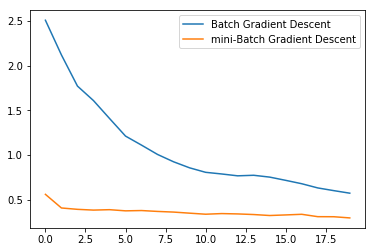

In [7]:
# Plot Losses
plt.plot(loss_history_bgd, label="Batch Gradient Descent")
plt.plot(loss_history_mbgd, label="mini-Batch Gradient Descent")
plt.legend()

In [10]:
def test(test_x, test_y, w1, b1, w2, b2):
    # Flatten input (batch_size, 28, 28) -> (batch_size, 784) 
    x = test_x.reshape(test_x.shape[0], -1)
    m = x.shape[0]
    
    # Turn labels into their one-hot representations
    y = one_hot_encoder(test_y)

    # Forward Pass
    h1 = np.dot(x, w1) + b1
    a1 = sigmoid(h1)
    h2 = np.dot(a1, w2) + b2
    a2 = softmax(h2)
    out = a2

    # Cross Entropy Loss
    loss = cross_entropy_loss(out, test_y)
    print("Loss: {:.6f}".format(loss/m))

    # Compute and print accuracy
    pred = np.argmax(out, axis=1)
    pred = pred.reshape(pred.shape[0], 1)
    acc = np.mean(pred == test_y)
    print("Accuracy: {:.2f}%\n".format(acc*100))
    
print("Batch Gradient Descent")
test(test_x, test_y, w1_bgd, b1_bgd, w2_bgd, b2_bgd)
print("mini-Batch Gradient Descent")
test(test_x, test_y, w1_mbgd, b1_mbgd, w2_mbgd, b2_mbgd)

Batch Gradient Descent
Loss: 0.538221
Accuracy: 86.68%

mini-Batch Gradient Descent
Loss: 0.296906
Accuracy: 91.41%



C:\Users\Rusty\Desktop\mnist_experiments\activation.py:9: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
